<a href="https://colab.research.google.com/github/Naveen64Gudipati/ML_Algorithms/blob/main/Linear_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#libraries required for the linear regression
import pandas as pd #to read a data from different resource
import matplotlib.pyplot as plt #visiualization purpose
import numpy as np
%matplotlib inline

In [ ]:
df=pd.read_csv('height-weight.csv')
df.head()


,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

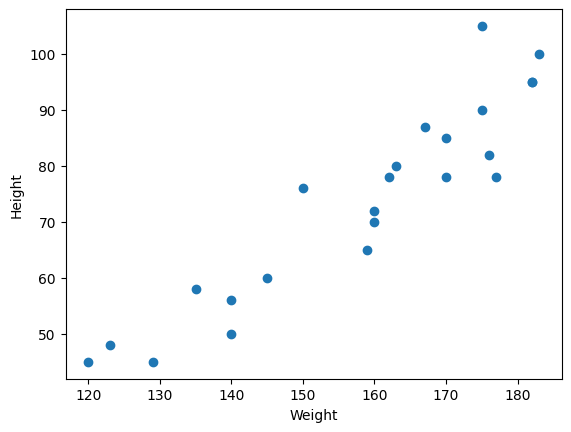

In [ ]:
#scatter plot
plt.scatter(df['Height'],df['Weight'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [ ]:
df.corr() #used to check the correlation between the X and Y coordinate

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


In [ ]:
#independent and dependent features
X=df[['Weight']] # if we give the two square bracs it will convert the series data into DF, Data must in a DF or 2D Array format.
y=df['Height'] #this can be in a series of 1D array format
y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
#Standardization mean=0 and standard deviation of 1.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()#initialing the formula
X_train=scaler.fit_transform(X_train) #fit_transform:  fitting a model on the training data and transforming the data based on the learned parameters.


In [ ]:
X_test=scaler.transform(X_test)# here we use transform to use the mean and SD of the X_train.
#here if we use fit_transform their is a chance of data leakage
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [ ]:
#Apply simple linear regression
from sklearn.linear_model import LinearRegression
reg=LinearRegression(n_jobs=-1)#initialing the LinearRegression
reg.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [ ]:
print("Coefficents: ",reg.coef_) #to know the coefficent of the datasets
print("Intercept:",reg.intercept_)#intercept value where weight is 0 the line meets at Y-axis

Coefficents:  [17.2982057]
Intercept: 156.47058823529412


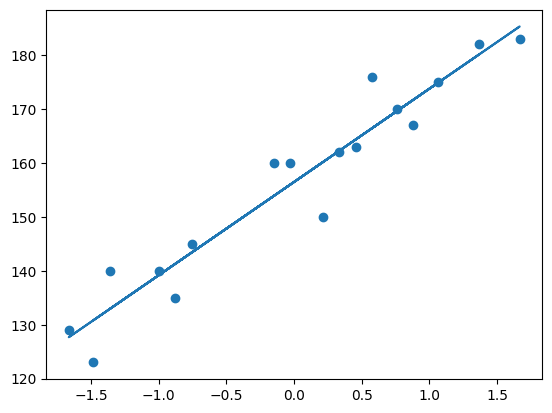

In [ ]:
#plotting the best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,reg.predict(X_train))

In [ ]:
y_pred=reg.predict(X_test)
y_pred

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

In [ ]:
#performance matrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.66512588679501
10.716374991212605


In [ ]:
#R2
from sklearn.metrics import r2_score

R square
Formula

R^2 = 1 - SSR/SST

R^2 = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares

In [ ]:
score=r2_score(y_test,y_pred)
print(score)

0.7360826717981276


Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]

where:

R2: The R2 of the model n: The number of observations k: The number of predictor variables

In [ ]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6701033397476595

In [ ]:
reg.predict(scaler.transform([[72]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])